# Основные Импорты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных
df = pd.read_csv('resources/Billionaires Statistics Dataset.csv')

# Пункт - 1. Типы и роли данных (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [5]:
# Исследование структуры данных
print("Размерность данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nСтатистическое описание числовых переменных:")
print(df.describe())

print("\nСтатистическое описание категориальных переменных:")
print(df.describe(include=['object']))

# Анализ пропущенных значений
print("\nПропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Размерность данных: (2640, 35)

Первые 5 строк:
   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country          

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

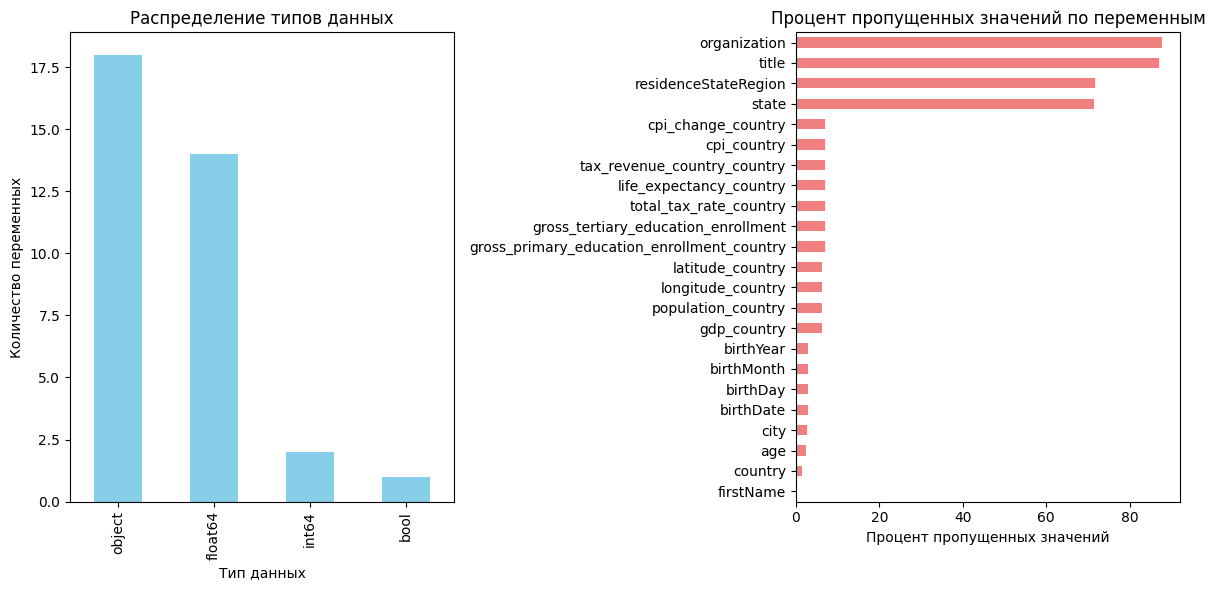

In [6]:
# Визуализация распределения типов данных
plt.figure(figsize=(12, 6))

# Количество переменных по типам
dtype_counts = df.dtypes.value_counts()
plt.subplot(1, 2, 1)
dtype_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество переменных')

# Процент пропущенных значений
plt.subplot(1, 2, 2)
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Процент пропущенных значений по переменным')
plt.xlabel('Процент пропущенных значений')

plt.tight_layout()
plt.show()

# Пункт - 2. Пропущенные значения (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [7]:
# Анализ пропущенных значений
print("=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")
print(f"Общее количество строк: {len(df)}")
print(f"Общее количество пропущенных значений: {df.isnull().sum().sum()}")
print(f"Процент пропущенных значений в наборе данных: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

# Детальный анализ по колонкам
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===")
missing_info = pd.DataFrame({
    'Колонка': missing_data.index,
    'Пропущено': missing_data.values,
    'Процент': missing_percent.values
})
missing_info = missing_info[missing_info['Пропущено'] > 0].sort_values('Процент', ascending=False)
print(missing_info)

=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Общее количество строк: 2640
Общее количество пропущенных значений: 10812
Процент пропущенных значений в наборе данных: 11.70%

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===
                                       Колонка  Пропущено    Процент
10                                organization       2315  87.689394
17                                       title       2301  87.159091
20                        residenceStateRegion       1893  71.704545
19                                       state       1887  71.477273
25                          cpi_change_country        184   6.969697
24                                 cpi_country        184   6.969697
30                 tax_revenue_country_country        183   6.931818
27         gross_tertiary_education_enrollment        182   6.893939
31                      total_tax_rate_country        182   6.893939
29                     life_expectancy_country        182   6.893939
28  gross_primary_education_en

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

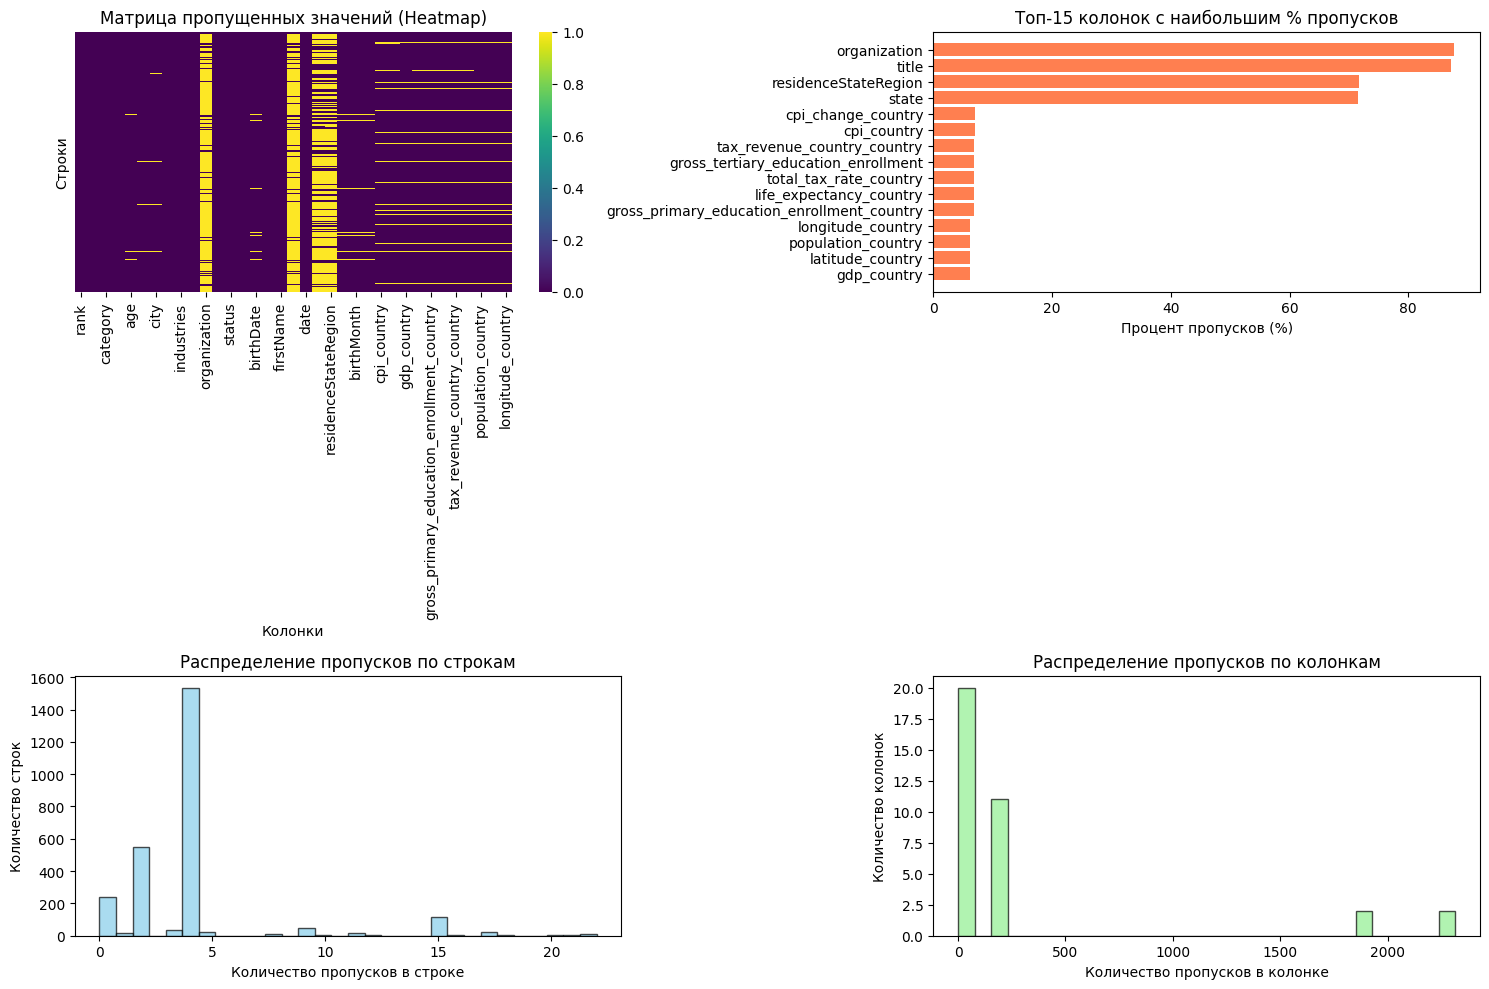

In [8]:
# Визуализация пропущенных значений
plt.figure(figsize=(15, 10))

# Heatmap пропущенных значений
plt.subplot(2, 2, 1)
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Матрица пропущенных значений (Heatmap)')
plt.xlabel('Колонки')
plt.ylabel('Строки')

# Процент пропущенных значений по колонкам
plt.subplot(2, 2, 2)
top_missing = missing_info.head(15)
plt.barh(top_missing['Колонка'], top_missing['Процент'], color='coral')
plt.title('Топ-15 колонок с наибольшим % пропусков')
plt.xlabel('Процент пропусков (%)')
plt.gca().invert_yaxis()

# Распределение количества пропусков по строкам
plt.subplot(2, 2, 3)
missing_per_row = df.isnull().sum(axis=1)
plt.hist(missing_per_row, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение пропусков по строкам')
plt.xlabel('Количество пропусков в строке')
plt.ylabel('Количество строк')

# Распределение количества пропусков по колонкам
plt.subplot(2, 2, 4)
missing_per_col = df.isnull().sum()
plt.hist(missing_per_col, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Распределение пропусков по колонкам')
plt.xlabel('Количество пропусков в колонке')
plt.ylabel('Количество колонок')

plt.tight_layout()
plt.show()

# Пункт - 3 - Сводные показатели (2 балла)



## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [9]:
# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")

print("=== БАЗОВЫЕ СВОДНЫЕ ПОКАЗАТЕЛИ ===")
print(f"Общее количество миллиардеров: {len(df)}")
print(f"Период данных: {df['date'].min()} - {df['date'].max()}")

=== БАЗОВЫЕ СВОДНЫЕ ПОКАЗАТЕЛИ ===
Общее количество миллиардеров: 2640
Период данных: 4/4/2023 5:01 - 4/4/2023 9:01


## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [10]:
# 1. Анализ распределения богатства
print("\n=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОГАТСТВА ===")

wealth_stats = df['finalWorth'].describe()
print("Статистика по состоянию (finalWorth) в млн $:")
print(f"Среднее: {wealth_stats['mean']:,.0f}")
print(f"Медиана: {wealth_stats['50%']:,.0f}")
print(f"Стандартное отклонение: {wealth_stats['std']:,.0f}")
print(f"Минимум: {wealth_stats['min']:,.0f}")
print(f"Максимум: {wealth_stats['max']:,.0f}")
print(f"Первый квартиль (25%): {wealth_stats['25%']:,.0f}")
print(f"Третий квартиль (75%): {wealth_stats['75%']:,.0f}")

# Дополнительные метрики
print(f"\nДополнительные метрики:")
print(f"Коэффициент вариации: {(wealth_stats['std']/wealth_stats['mean']*100):.1f}%")
print(f"Асимметрия (skewness): {df['finalWorth'].skew():.2f}")
print(f"Эксцесс (kurtosis): {df['finalWorth'].kurtosis():.2f}")


=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОГАТСТВА ===
Статистика по состоянию (finalWorth) в млн $:
Среднее: 4,624
Медиана: 2,300
Стандартное отклонение: 9,834
Минимум: 1,000
Максимум: 211,000
Первый квартиль (25%): 1,500
Третий квартиль (75%): 4,200

Дополнительные метрики:
Коэффициент вариации: 212.7%
Асимметрия (skewness): 10.01
Эксцесс (kurtosis): 145.07


NameError: name 'stats' is not defined

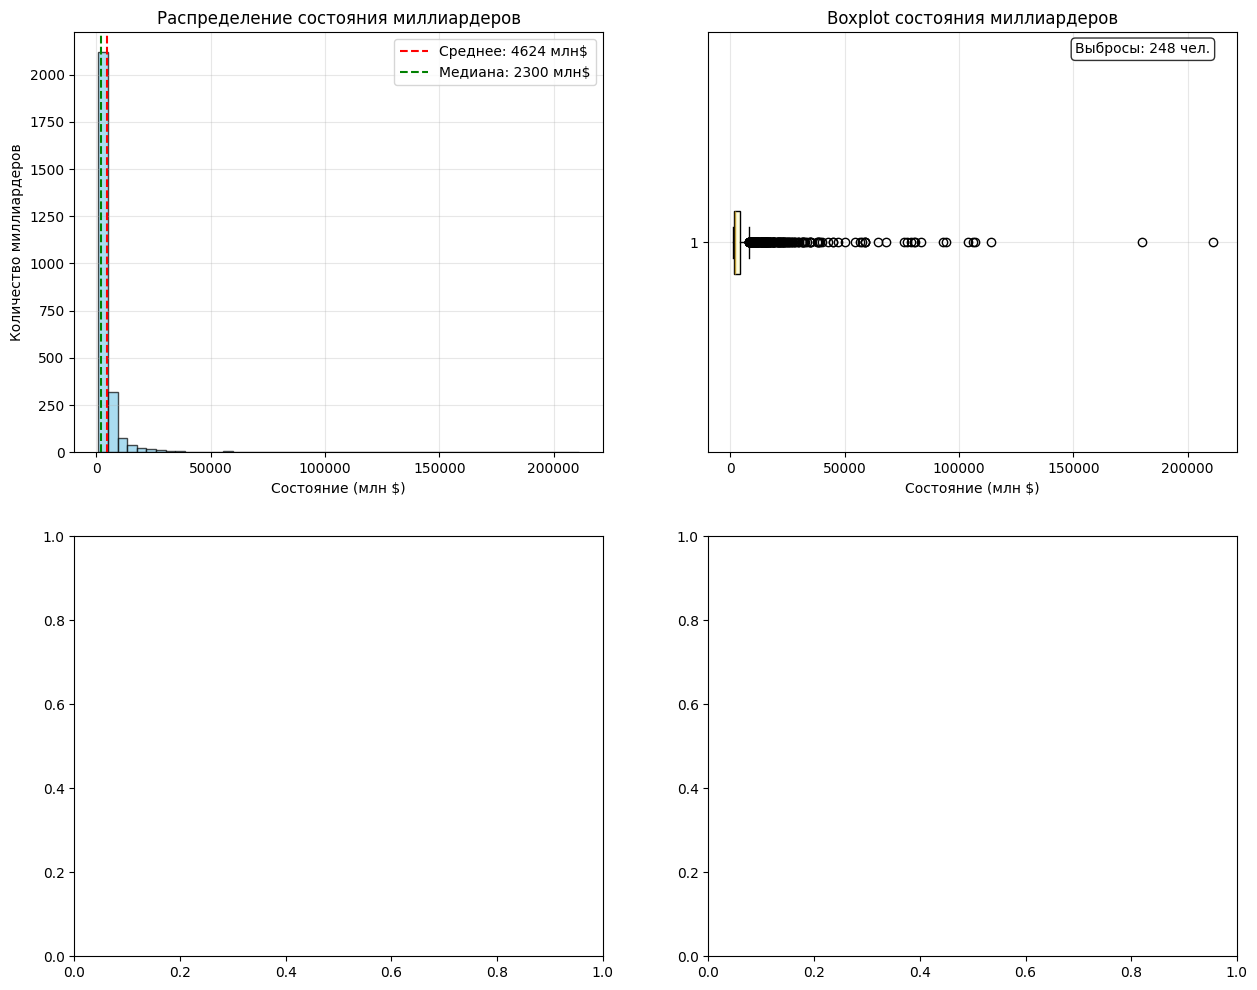

In [ ]:
# Визуализация распределения богатства
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Гистограмма распределения богатства
axes[0,0].hist(df['finalWorth'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['finalWorth'].mean(), color='red', linestyle='--', label=f'Среднее: {df["finalWorth"].mean():.0f}M')
axes[0,0].axvline(df['finalWorth'].median(), color='green', linestyle='--', label=f'Медиана: {df["finalWorth"].median():.0f}M')
axes[0,0].set_xlabel('Состояние (млн $)')
axes[0,0].set_ylabel('Количество миллиардеров')
axes[0,0].set_title('Распределение состояния миллиардеров')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Boxplot распределения богатства
axes[0,1].boxplot(df['finalWorth'], vert=False)
axes[0,1].set_xlabel('Состояние (млн $)')
axes[0,1].set_title('Boxplot состояния миллиардеров')
axes[0,1].grid(True, alpha=0.3)

# QQ-plot для проверки нормальности
stats.probplot(df['finalWorth'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot распределения богатства')

# Распределение в логарифмической шкале
axes[1,1].hist(np.log1p(df['finalWorth']), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_xlabel('log(Состояние + 1)')
axes[1,1].set_ylabel('Количество')
axes[1,1].set_title('Распределение логарифма состояния')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== АНАЛИЗ ПО ОТРАСЛЯМ ===
Топ-10 отраслей по суммарному состоянию:
                       Количество  Суммарное_состояние  Среднее_состояние  \
industries                                                                  
Technology                    314              1877900             5981.0   
Fashion & Retail              266              1698800             6386.0   
Finance & Investments         372              1605100             4315.0   
Manufacturing                 324              1019000             3145.0   
Food & Beverage               212               957200             4515.0   
Diversified                   187               905200             4841.0   
Real Estate                   193               657400             3406.0   
Healthcare                    201               643200             3200.0   
Automotive                     73               525300             7196.0   
Energy                        100               453500             4535.0   

      

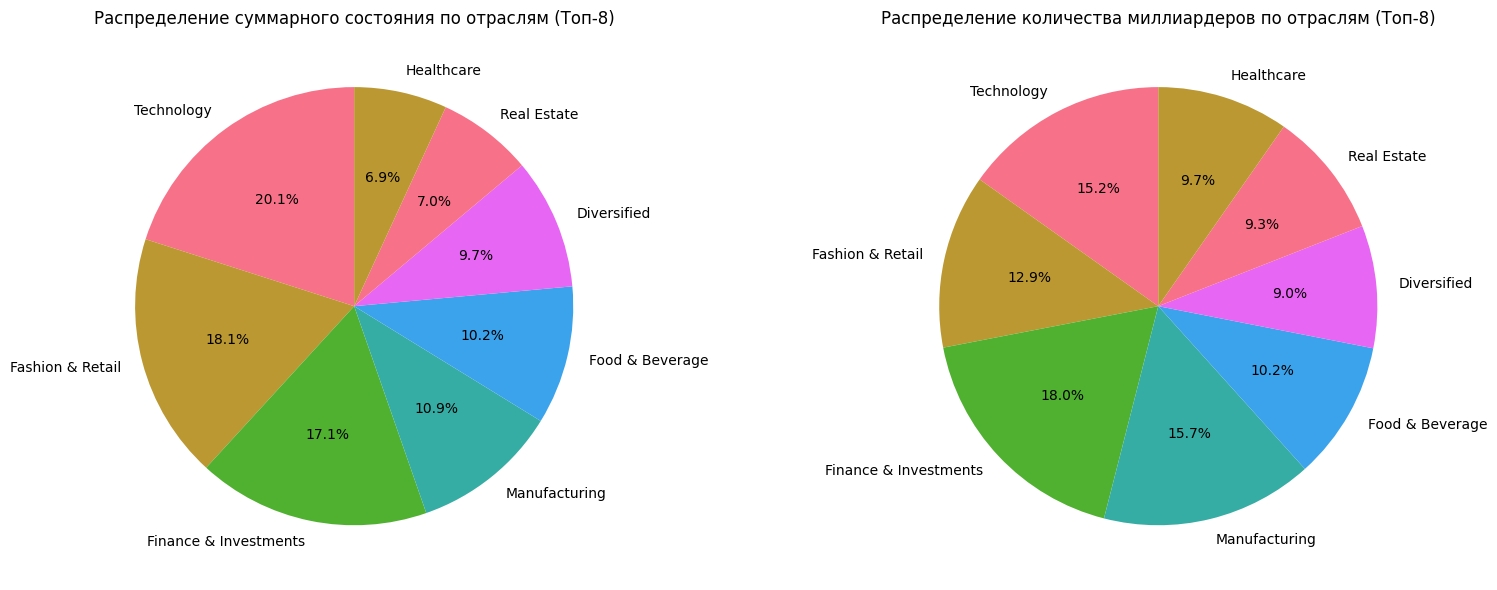

In [12]:
# 3. Анализ по отраслям (industries)
print("\n=== АНАЛИЗ ПО ОТРАСЛЯМ ===")

industry_stats = df.groupby('industries').agg({
    'finalWorth': ['count', 'sum', 'mean', 'median'],
    'personName': 'count'
}).round(0)

industry_stats.columns = ['Количество', 'Суммарное_состояние', 'Среднее_состояние', 
                        'Медиана_состояния', 'Всего_миллиардеров']
industry_stats = industry_stats.sort_values('Суммарное_состояние', ascending=False)

print("Топ-10 отраслей по суммарному состоянию:")
print(industry_stats.head(10))

# Визуализация по отраслям
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Круговые диаграммы
wealth_by_industry = industry_stats.head(8)['Суммарное_состояние']
count_by_industry = industry_stats.head(8)['Количество']

axes[0].pie(wealth_by_industry.values, labels=wealth_by_industry.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Распределение суммарного состояния по отраслям (Топ-8)')

axes[1].pie(count_by_industry.values, labels=count_by_industry.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Распределение количества миллиардеров по отраслям (Топ-8)')

plt.tight_layout()
plt.show()

In [13]:
# 4. Демографический анализ
print("\n=== ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ===")

# Анализ по возрасту
age_stats = df['age'].describe()
print("Статистика по возрасту:")
print(f"Средний возраст: {age_stats['mean']:.1f} лет")
print(f"Медианный возраст: {age_stats['50%']:.1f} лет")
print(f"Самый молодой: {age_stats['min']:.0f} лет")
print(f"Самый старший: {age_stats['max']:.0f} лет")

# Анализ по полу
gender_stats = df['gender'].value_counts()
print(f"\nРаспределение по полу:")
print(gender_stats)

gender_wealth = df.groupby('gender')['finalWorth'].agg(['mean', 'median', 'count'])
print(f"\nСтатистика состояния по полу:")
print(gender_wealth)

# Анализ self-made
selfmade_stats = df['selfMade'].value_counts()
print(f"\nРаспределение Self-Made:")
print(selfmade_stats)

selfmade_wealth = df.groupby('selfMade')['finalWorth'].agg(['mean', 'median', 'count'])
print(f"\nСтатистика состояния по Self-Made:")
print(selfmade_wealth)


=== ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ===
Статистика по возрасту:
Средний возраст: 65.1 лет
Медианный возраст: 65.0 лет
Самый молодой: 18 лет
Самый старший: 101 лет

Распределение по полу:
gender
M    2303
F     337
Name: count, dtype: int64

Статистика состояния по полу:
               mean  median  count
gender                            
F       4570.326409  2500.0    337
M       4631.610942  2300.0   2303

Распределение Self-Made:
selfMade
True     1812
False     828
Name: count, dtype: int64

Статистика состояния по Self-Made:
                 mean  median  count
selfMade                            
False     4970.410628  2600.0    828
True      4465.397351  2200.0   1812


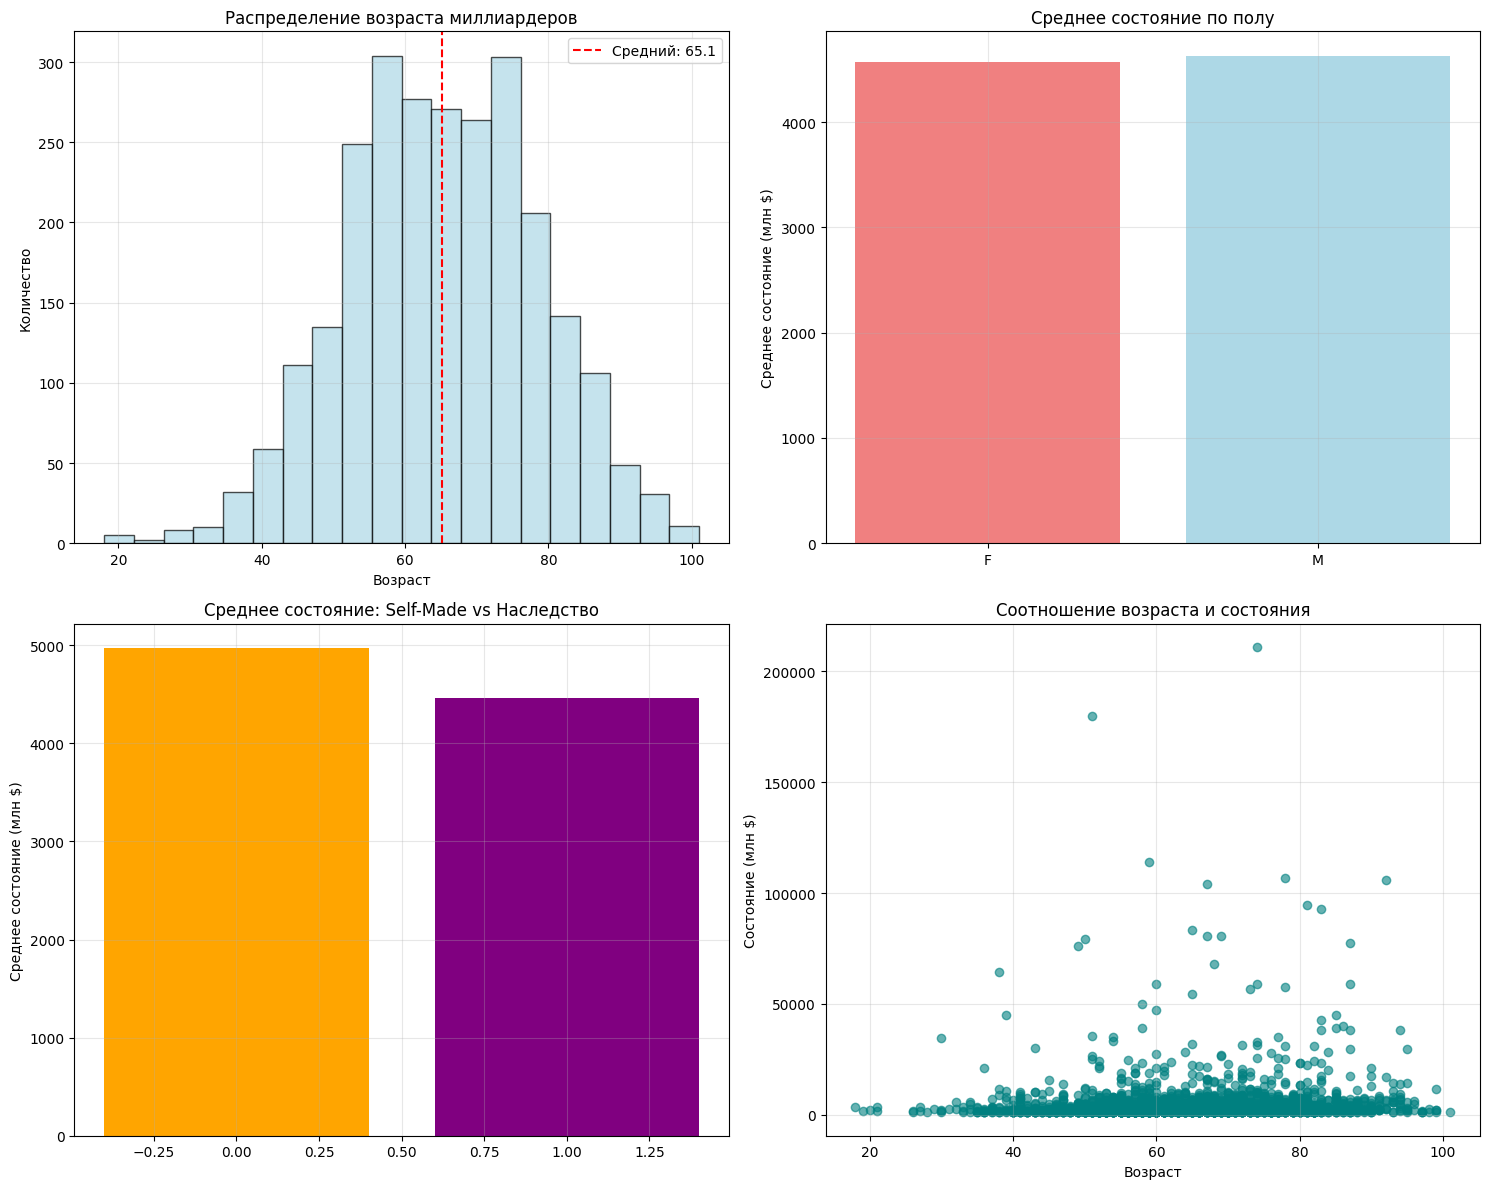

In [14]:
# Визуализация демографических показателей
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение возраста
axes[0,0].hist(df['age'].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Средний: {df["age"].mean():.1f}')
axes[0,0].set_xlabel('Возраст')
axes[0,0].set_ylabel('Количество')
axes[0,0].set_title('Распределение возраста миллиардеров')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Состояние по полу
gender_means = df.groupby('gender')['finalWorth'].mean()
axes[0,1].bar(gender_means.index, gender_means.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[0,1].set_ylabel('Среднее состояние (млн $)')
axes[0,1].set_title('Среднее состояние по полу')
axes[0,1].grid(True, alpha=0.3)

# Состояние по self-made
selfmade_means = df.groupby('selfMade')['finalWorth'].mean()
axes[1,0].bar(selfmade_means.index, selfmade_means.values, color=['orange', 'purple'])
axes[1,0].set_ylabel('Среднее состояние (млн $)')
axes[1,0].set_title('Среднее состояние: Self-Made vs Наследство')
axes[1,0].grid(True, alpha=0.3)

# Возраст vs Состояние
axes[1,1].scatter(df['age'], df['finalWorth'], alpha=0.6, color='teal')
axes[1,1].set_xlabel('Возраст')
axes[1,1].set_ylabel('Состояние (млн $)')
axes[1,1].set_title('Соотношение возраста и состояния')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# 5. Корреляционный анализ
print("\n=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

# Выбираем числовые колонки для корреляционного анализа
numeric_cols = ['finalWorth', 'age', 'birthYear', 'cpi_country', 'gdp_country', 
               'gross_tertiary_education_enrollment', 'life_expectancy_country',
               'tax_revenue_country_country', 'total_tax_rate_country', 'population_country']

# Создаем копию DataFrame только с нужными колонками
df_corr = df[numeric_cols].copy()

# Преобразуем все колонки к числовому формату, игнорируя ошибки
for col in df_corr.columns:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# Удаляем строки с пропущенными значениями (после преобразования)
df_corr_clean = df_corr.dropna()

print(f"Исходное количество строк: {len(df)}")
print(f"Количество строк после очистки: {len(df_corr_clean)}")

# Проверяем, что осталось достаточно данных для анализа
if len(df_corr_clean) > 0:
    correlation_matrix = df_corr_clean.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Матрица корреляций числовых переменных')
    plt.tight_layout()
    plt.show()

    print("Корреляция состояния (finalWorth) с другими переменными:")
    wealth_corr = correlation_matrix['finalWorth'].sort_values(ascending=False)
    print(wealth_corr)
else:
    print("Недостаточно данных для корреляционного анализа после очистки")


=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===
Исходное количество строк: 2640
Количество строк после очистки: 0
Недостаточно данных для корреляционного анализа после очистки


# Пункт - 4. Анализ связей показателей (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ

# Пункт - 5.  Многомерный анализ (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ